## 1-1. 量子ビット
古典コンピュータ（量子コンピュータではない既存のコンピュータのこと）内部では情報は 0 と 1 の２つの状態で表現されている。例えば、スイッチのオン・オフの状態や、電荷がたまった状態とそうでない状態、電圧の高・低などでその２状態を表現している。一方、量子力学では異なる２つの状態の**重ね合わせ状態**というのが許されているので、量子の世界の情報の最小単位である**“量子”ビット**は $\alpha$と$\beta$という二つの複素数を用いた複素ベクトルを用いて

$$
\left(
\begin{array}{c}
\alpha 
\\
\beta 
\end{array}
\right)
$$

のようにその量子状態が記述される。

$\alpha$や$\beta$はどの程度の重みで0状態と1状態が重ね合わさっているかを表しており、**複素確率振幅**と呼ばれる。
$\alpha$や$\beta$が複素数になっているのは、量子の世界では0や1といった離散的な量も波の性質をもち干渉するためである。

古典ビットの0に対応する状態は

$$
\left(
\begin{array}{c}
1 
\\
0
\end{array}
\right)
$$

1に対応する状態は

$$
\left(
\begin{array}{c}
0 
\\
1
\end{array}
\right)
$$

となる。

列ベクトルを毎回書いているとスペースが無駄なので、**ディラックのブラケット表記**という簡略化した表記を導入する。これは列ベクトルである、という量子状態の型宣言のようなもので、この記号がついていると量子状態をあらわす複素ベクトルであることが一目でわかるようになっている。

$$
|0\rangle = \left(
\begin{array}{c}
1 
\\
0
\end{array}
\right)
$$
$$
|1\rangle = \left(
\begin{array}{c}
0
\\
1
\end{array}
\right)
$$

この表記を用いると量子ビットは

$$
|\psi \rangle = \alpha |0\rangle + \beta |1\rangle 
$$

と書かれる（スペースが省略できた！）。

### 複素確率振幅の意味

複素確率振幅はいったいどのような物理的実体に対応するだろうか。実は、量子力学では観測者（人間）は直接複素確率振幅にはアクセスすることができず、**測定という操作をした時に初めて0か1かが確率的にきまる**。測定結果の確率分布に影響するのが複素確率振幅である。測定結果が0になる確率$p_0$, 1になる確率$p_1$は複素確率振幅の絶対値の2乗で表される:

$$ 
p_0 = |\alpha |^2,
\\
p_1 = |\beta |^2
$$

確率の和が1になるように、規格化条件 $|\alpha |^2 + |\beta |^2 =1$を課す。

**測定を行うと、量子状態は測定結果に対応する状態に変化する**。具体的には、測定結果が0の場合は$|0\rangle$、1の場合は$|1\rangle$に変化する。この測定を、正規直交基底$|0\rangle$, $|1\rangle$での射影測定と呼ぶ。$|0\rangle$, $|1\rangle$以外の正規直交基底での射影測定や、より一般の測定もあるが、ここでは扱わない。

まとめると、

- 量子状態は、大きさが１に規格化された複素ベクトルによって記述される。
- 各成分の絶対値の２乗が、測定をしたときにその成分に対応する状態を得る確率である。
- 測定後の量子状態は、測定結果に応じて$|0\rangle$または$|1\rangle$となる。

したがって、

$$
|0\rangle = \left(
\begin{array}{c}
1 
\\
0
\end{array}
\right), |1\rangle = \left(
\begin{array}{c}
0
\\
1
\end{array}
\right)
$$

は、確実に0や1が得られる古典的な状態に対応し、

$$
\frac{1}{\sqrt{2}}
(|0\rangle + |1\rangle) = \left(
\begin{array}{c}
\frac{1}{\sqrt{2}}
\\
\frac{1}{\sqrt{2}}
\end{array}
\right)
$$

は0と1が同じ重みで重ね合わさった状態であり、測定をすると0と1が確率1/2で完全にランダムに得られる。

複素確率振幅は複素数なので、

$$
\frac{1}{\sqrt{2}}(|0\rangle + i|1\rangle ) =
\left( 
\begin{array}{c}
\frac{1}{\sqrt{2}}
\\
\frac{i}{\sqrt{2}}
\end{array}
\right)
$$

といった状態も許されている。より一般に、

$$
\frac{1}{\sqrt{2}} ( |0\rangle + e^{ i \phi } |1\rangle )
$$

なども許されている。この状態の場合、状態0に対する確率振幅 ($1/\sqrt{2}$) が正の実数であるのに対して、状態1に対する確率振幅 ($e^{i\phi}/\sqrt{2}$) は、複素平面上で$\phi$回転している。このような、重ね合わせ状態における確率振幅間の相対的な偏角のことを**位相**と呼び、量子力学全般において重要な役割を果たす。

(詳細は Nielsen-Chuang の `1.2 Quantum bits` を参照)

### SymPyを用いて量子ビットを表示してみる
SymPyでは、量子状態を扱うことができる。初期化された量子ビットを準備する場合は ` Qubit() ` 関数を用いる。


In [1]:
from IPython.display import Image, display_png
from sympy import *
from sympy.physics.quantum import *
from sympy.physics.quantum.qubit import Qubit,QubitBra
init_printing() # ベクトルや行列を綺麗に表示するため

In [2]:
# Google Colaboratory上でのみ実行してください
from IPython.display import HTML
def setup_mathjax():
    display(HTML('''
    <script>
        if (!window.MathJax && window.google && window.google.colab) {
            window.MathJax = {
                'tex2jax': {
                    'inlineMath': [['$', '$'], ['\\(', '\\)']],
                    'displayMath': [['$$', '$$'], ['\\[', '\\]']],
                    'processEscapes': true,
                    'processEnvironments': true,
                    'skipTags': ['script', 'noscript', 'style', 'textarea', 'code'],
                    'displayAlign': 'center',
                },
                'HTML-CSS': {
                    'styles': {'.MathJax_Display': {'margin': 0}},
                    'linebreaks': {'automatic': true},
                    // Disable to prevent OTF font loading, which aren't part of our
                    // distribution.
                    'imageFont': null,
                },
               'messageStyle': 'none'
            };
            var script = document.createElement("script");
            script.src = "https://colab.research.google.com/static/mathjax/MathJax.js?config=TeX-AMS_HTML-full,Safe";
            document.head.appendChild(script);
        }
    </script>
    '''))
get_ipython().events.register('pre_run_cell', setup_mathjax)

In [3]:
psi = Qubit('0')

In [4]:
psi #ブラケット表示

In [5]:
represent(psi) #列ベクトル表示

SymPyでは文字をシンボルとして扱うことができるので、一般的な量子ビットも簡単に書ける。

In [6]:
a, b = symbols('alpha, beta')  #a, bをシンボルとして、alpha, betaとして表示
ket0 = Qubit('0')
ket1 = Qubit('1')
psi = a * ket0 + b* ket1
psi # 状態をそのまま書くとケットで表示してくれる

In [7]:
represent(psi)

もちろん具体的な数値を代入することもできる。

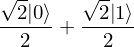

In [8]:
psi.subs([([a,1/sqrt(2)]),([b,1/sqrt(2)])]) # alpha, betaに具体的な数字を代入